<a href="https://colab.research.google.com/github/jorgelizarazo94/Final_Exploratory_Analysis_Icesi/blob/main/Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory analysis at the project**                               "Intra- and inter-specific variability of functional traits in two populations of endemic Zamias and their hybrids in the Colombian Chocó biogeographic region"
[Jorge Lizarazo](https://www.researchgate.net/profile/Jorge-Lizarazo-Borrero)

**3/22/2023**

______________________________
Project created for an undergraduated thesis by Laura Fierro and supervised by the [PhD Camila Pizano](https://www.researchgate.net/profile/Camila-Pizano-3) 


## Introduction

This exploratory analysis focuses on *Zamia amplifolia* and *Z. chigua* species, as well as their so called hybrids, in a specific location in the Bajo Calima region, Valle del Cauca (3°59′56.9″N 76°58′28.0″W). The aim of the study is to collect functional trait measurements for each individual, with a particular focus on foliar traits.

As the *Zamia* genus lacks well-established methodologies for studying functional traits, protocols developed for angiosperms were followed. In addition, non-destructive protocols were used to measure functional traits, as *Z. amplifolia* and *Z. chigua* are classified as threatened species. These protocols were outlined by the Intituto Humboldt's applications and protocols for functional ecology.

Functional trait measurements were taken in the field for each individual, including the length of the longest leaf, total number of leaves, number of folioles per leaf, leaf arrangement, and length of the rachis without spines, using a measuring tape.

Furthermore, two random folioles were collected from each individual for stomatal counting and leaf area measurement. However, these measurements are currently still being processed; They´re not gonna be used here yet.



In [5]:
#@title
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image, HTML

img1 = Image('/content/drive/MyDrive/intento/amplifolia.jpg', width=100)
img2 = Image('/content/drive/MyDrive/intento/chigua.jpg', width=100)


Mounted at /content/drive


There are two examples of each specie

***Zamia amplifolia***

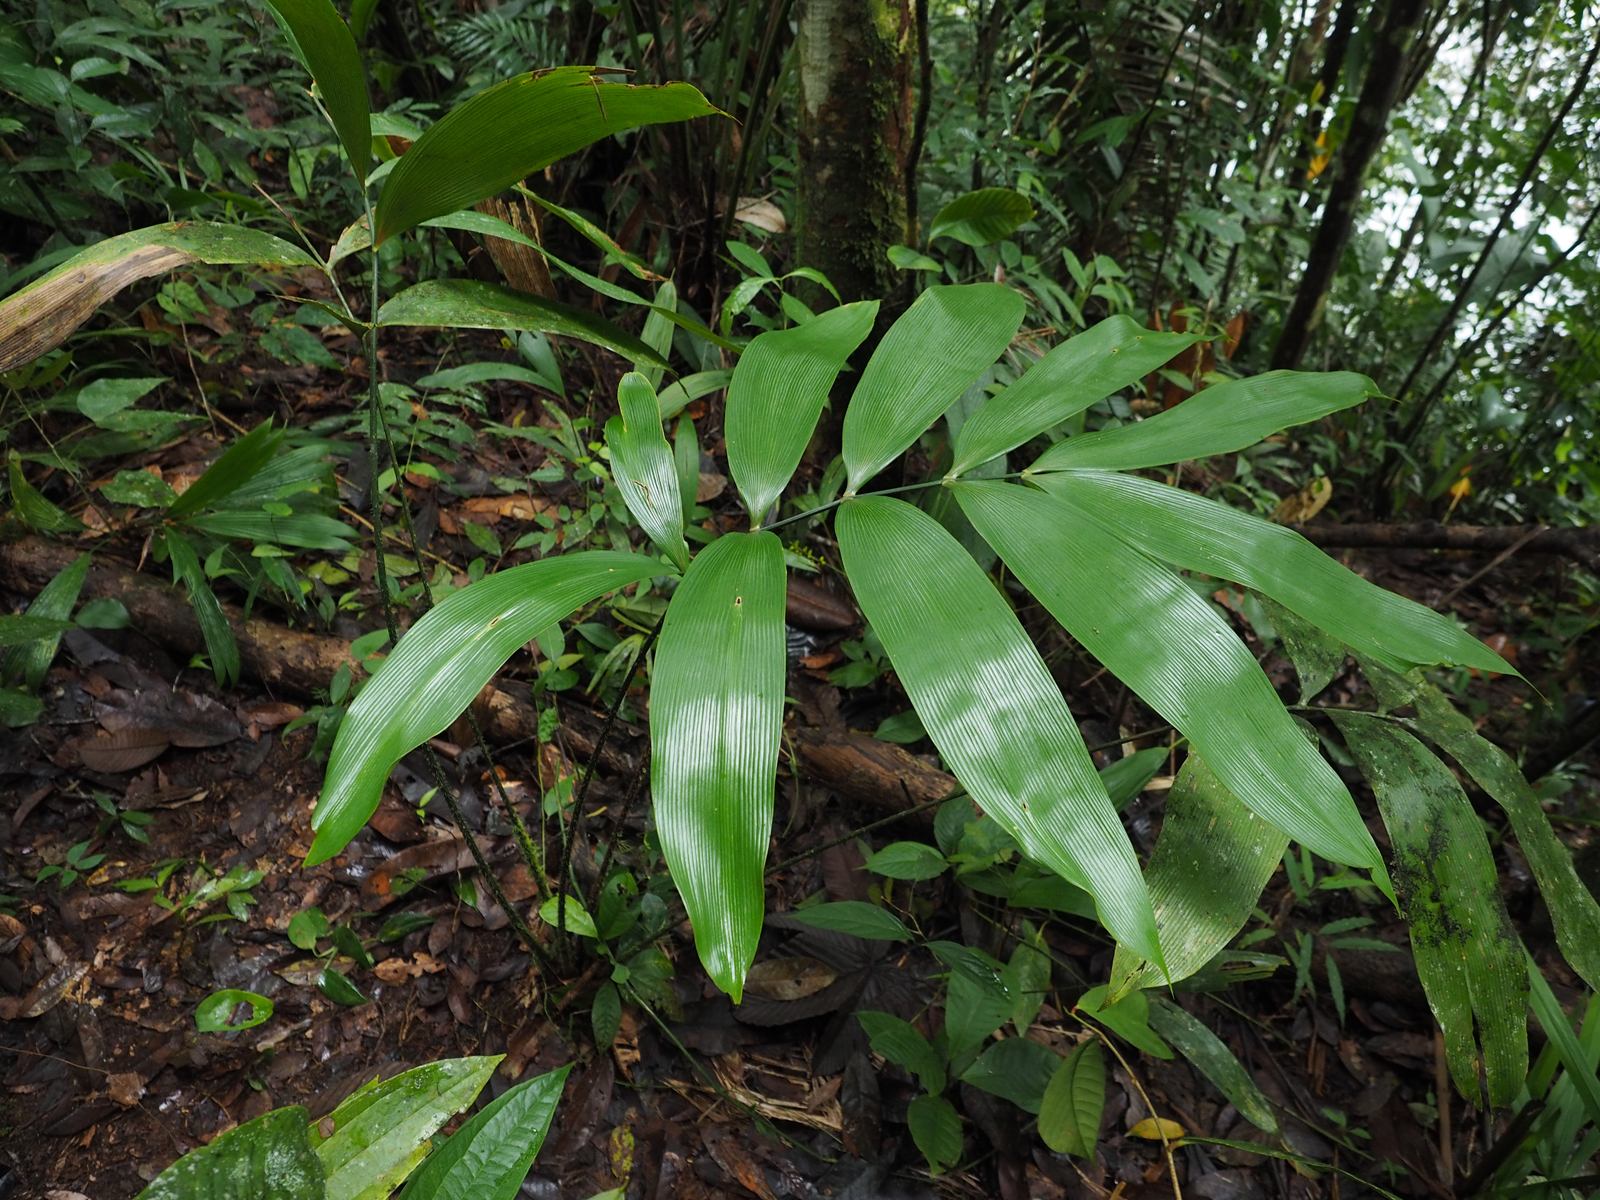

In [ ]:
#@title
img1

***Zamia chigua***

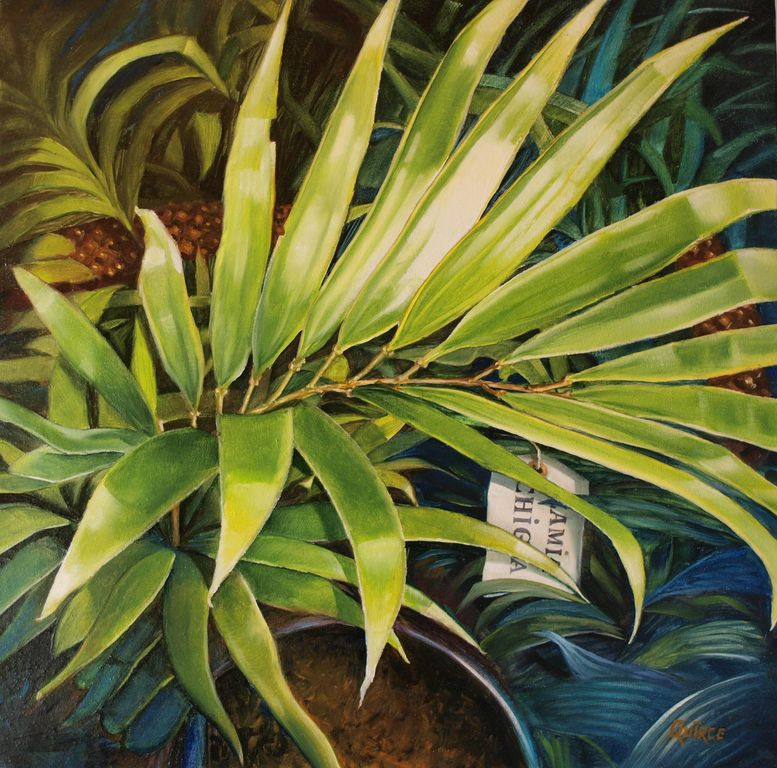

In [ ]:
#@title
img2

Hence there is the **"hybrid"**...

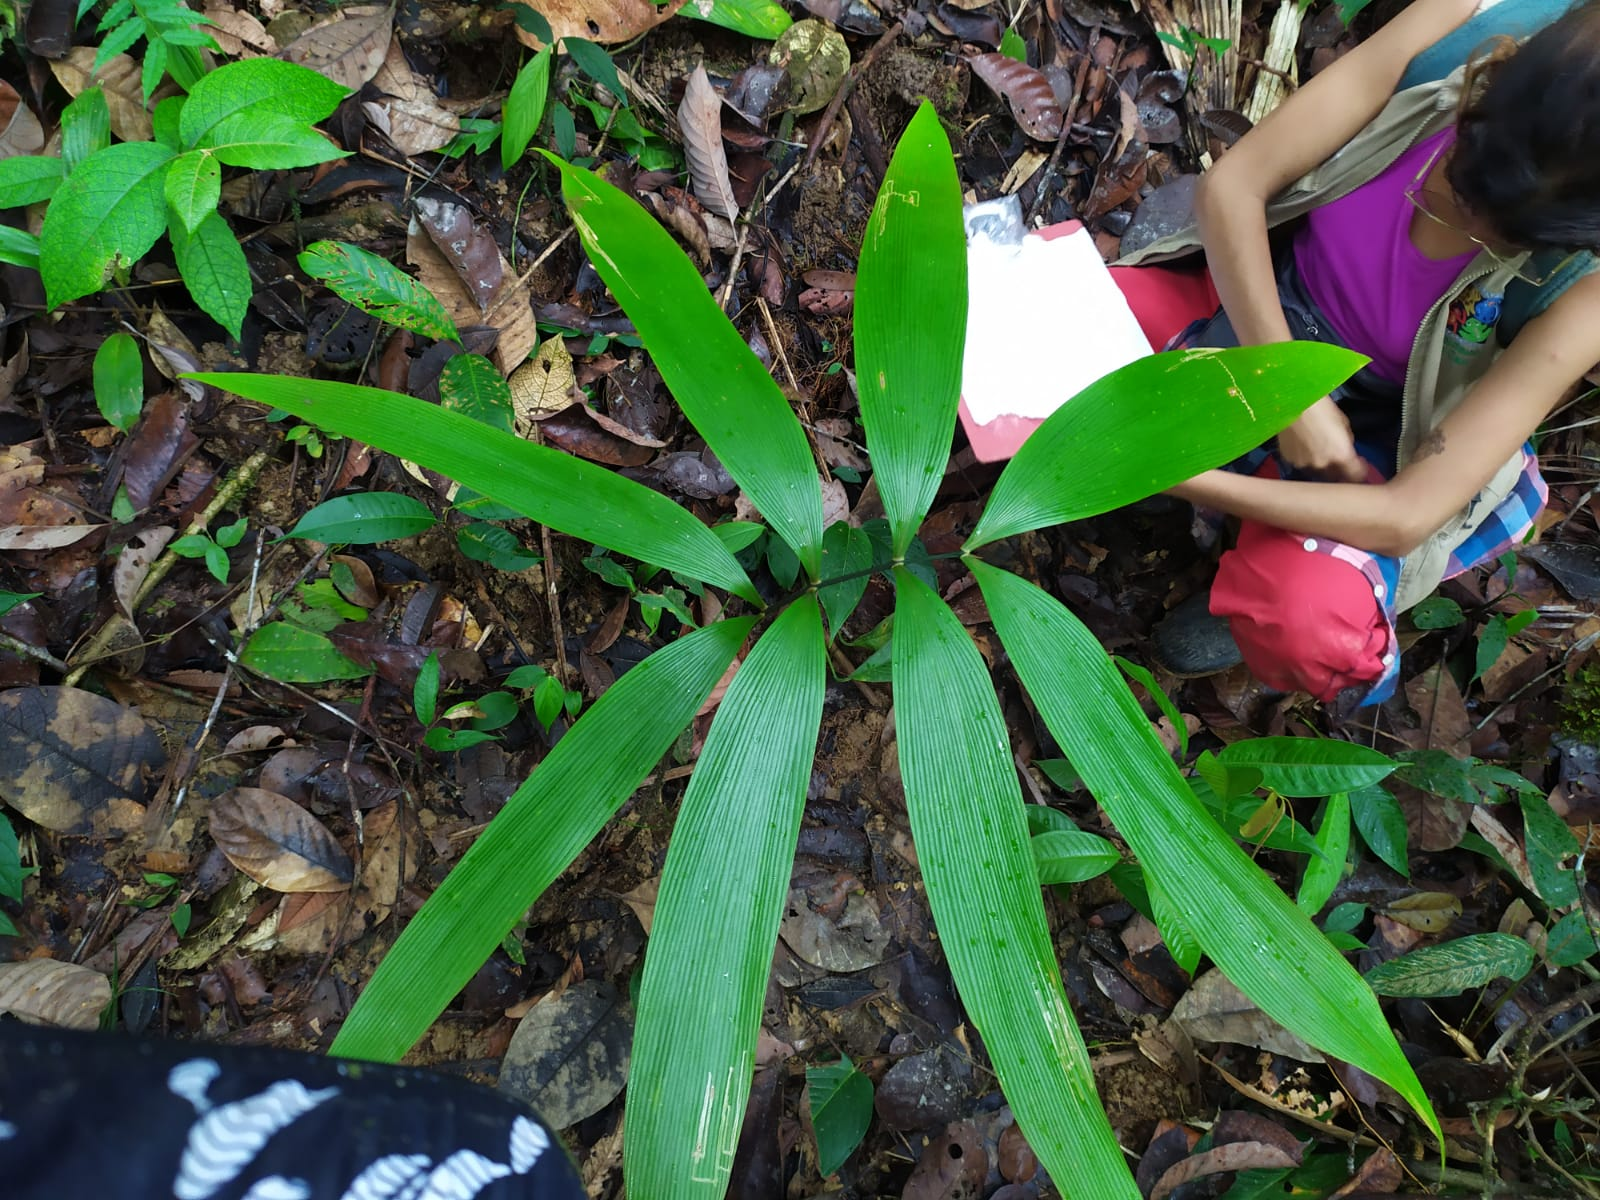

In [ ]:
#@title
img3 = Image('/content/drive/MyDrive/intento/WhatsApp Image 2023-03-22 at 7.31.14 PM (1).jpeg', width=100)
img3

## Modules and packages required

There were used the next collection of Modules and packages:

In [6]:

import pandas as pd  ####  
import numpy as np #### 
import xarray as xr  #### 
import matplotlib.pyplot as plt
import seaborn as sn


## Data Preparation

In [7]:
df = pd.read_csv('/content/drive/MyDrive/intento/Zamia_data_Icesi.csv', sep=',')
df


,ID,Sp,No. Hojas,No. Foliolos max,Long hoja + larga,Long raquis sin aguijones,Imbricacion,Observaciones
0,1,Chigua,15,228,207.0,78.0,1.5,Chi1
1,2,Chigua,3,140,183.0,32.0,1.5,2
2,3,Chigua,25,155,201.0,35.5,1.0,3
3,4,Amplifolia,1,10,38.0,17.0,4.2,2
4,5,Amplifolia,1,4,40.0,10.0,2.5,1-juvenil
...,...,...,...,...,...,...,...,...
133,134,Amplifolia,2,8,104.0,20.0,6.0,64- se midió la más joven (recolecta adulto)
134,135,Chigua,4,95,82.0,57.0,1.2,71
135,136,Amplifolia,2,6,76.0,15.0,4.0,76
136,137,Amplifolia,5,6,57.0,17.0,2.5,67


We can apreciate that some columns are called with long titles, we should simplify them later.

In [8]:
list(df.columns)

['ID',
 'Sp',
 'No. Hojas',
 'No. Foliolos max',
 'Long hoja + larga',
 'Long raquis sin aguijones',
 'Imbricacion',
 'Observaciones']

I wanna kown the NaNs values or forgotten data on the matrix

In [9]:
df.isna().sum()

ID                           0
Sp                           0
No. Hojas                    0
No. Foliolos max             0
Long hoja + larga            0
Long raquis sin aguijones    0
Imbricacion                  0
Observaciones                1
dtype: int64

There is just one missing value and it´s on across the observations, then we ignored.

In [10]:
df.dtypes

ID                             int64
Sp                            object
No. Hojas                      int64
No. Foliolos max               int64
Long hoja + larga            float64
Long raquis sin aguijones    float64
Imbricacion                  float64
Observaciones                 object
dtype: object

### Cleaned Data

In [11]:
diver_cob = df.groupby('Sp').count().reset_index()
diver_cob

,Sp,ID,No. Hojas,No. Foliolos max,Long hoja + larga,Long raquis sin aguijones,Imbricacion,Observaciones
0,Chigua,3,3,3,3,3,3,3
1,Amplifolia,66,66,66,66,66,66,65
2,Amplifolia-hibrido,1,1,1,1,1,1,1
3,Chigua,49,49,49,49,49,49,49
4,Chigua)?,1,1,1,1,1,1,1
5,Hibrido,15,15,15,15,15,15,15
6,Hibrido)?,1,1,1,1,1,1,1
7,Híbrido,2,2,2,2,2,2,2


It seems like there where some mistakes during the inputting proccess, as we can appreciate duplication on the column "Sp". We must integrate them into one object or factor.

In [12]:
df["Sp"] = df['Sp'].replace(['Hibrido)?', 'Híbrido'], 'Hibrido')
df["Sp"] = df['Sp'].replace([' Chigua', 'Chigua)?'], 'Chigua')
df["Sp"] = df['Sp'].replace(['Amplifolia-hibrido'], 'Amplifolia')
##### And yet I wanna change the column´s name then it would be simple 

df = df.rename(columns = {'No. Hojas': 'countHojas', 'No. Foliolos max': 'Foliolos_max',
                     'Long hoja + larga': 'leghtHoja', 'Long raquis sin aguijones': 'raquisin'})

diver_cob = df.groupby('Sp')['countHojas'].count().reset_index()
diver_cob

,Sp,countHojas
0,Amplifolia,67
1,Chigua,53
2,Hibrido,18


There are at least 18 counts for hybrids, and a rather good sample of *Z. amplifolia* and *Z. Chigua*. 

I wanna take a brief look at the measurements basic statistics (We must take off ID, due to being int64 data so do no needed).

In [13]:
dfdes = df.drop('ID', axis=1).drop('Observaciones', axis=1)
dfdes.groupby('Sp').describe() 

countHojas                                                \
                count      mean       std  min  25%  50%  75%   max   
Sp                                                                    
Amplifolia       67.0  1.910448  0.883028  1.0  1.0  2.0  2.0   5.0   
Chigua           53.0  5.056604  4.289590  1.0  2.0  4.0  6.0  25.0   
Hibrido          18.0  2.111111  2.373602  1.0  1.0  1.0  2.0  11.0   

           Foliolos_max              ... raquisin        Imbricacion  \
                  count        mean  ...      75%    max       count   
Sp                                   ...                               
Amplifolia         67.0    7.029851  ...     31.5   48.0        67.0   
Chigua             53.0  114.471698  ...     68.0  122.0        53.0   
Hibrido            18.0   22.611111  ...     35.0   48.0        18.0   

                                                            
                mean       std  min    25%  50%  75%   max  
Sp                                                          
Amplifolia  4.438806  2.391459  1.0  2.500  4.0  6.1  10.5  
Chigua      1.066038  0.358921  0.5  0.700  1.0  1.3   1.8  
Hibrido     2.866667  1.053845  0.8  2.275  3.0  3.3   5.5  

[3 rows x 40 columns]

In [14]:
dfdes.head(20)

,Sp,countHojas,Foliolos_max,leghtHoja,raquisin,Imbricacion
0,Chigua,15,228,207.0,78.0,1.5
1,Chigua,3,140,183.0,32.0,1.5
2,Chigua,25,155,201.0,35.5,1.0
3,Amplifolia,1,10,38.0,17.0,4.2
4,Amplifolia,1,4,40.0,10.0,2.5
5,Chigua,6,105,174.0,31.7,1.5
6,Chigua,1,121,84.0,28.0,0.6
7,Amplifolia,2,4,58.0,4.5,3.0
8,Chigua,7,202,210.0,107.0,1.0
9,Chigua,5,112,140.0,36.0,1.6


In [15]:
dfdes.dtypes

Sp               object
countHojas        int64
Foliolos_max      int64
leghtHoja       float64
raquisin        float64
Imbricacion     float64
dtype: object

In [16]:
dfdes['countHojas'] = dfdes['countHojas'].astype('float64')
dfdes['Foliolos_max'] = dfdes['Foliolos_max'].astype('float64')


Apparently, there are differences on the two species as well their hybrids. We must go deeper

## Proposed Exploratory Data Analysis

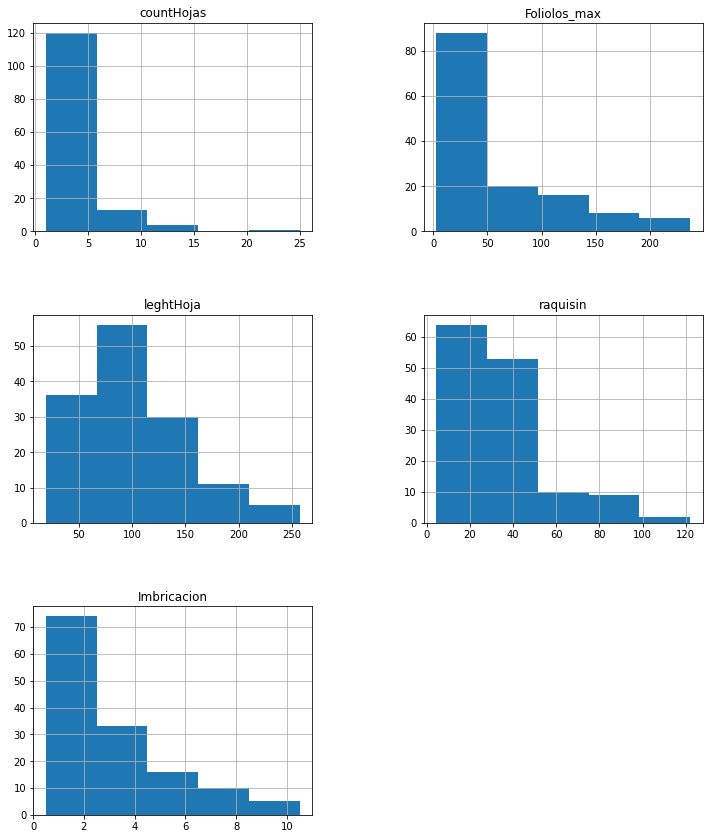

In [17]:
dfdes.hist(bins = 5 , figsize = (12,10 ))
plt.subplots_adjust(
                    bottom=0.1   ,
                    top=1.2 ,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [18]:
dfdes.groupby('Sp')['countHojas'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sp,,,,,,,,
Amplifolia,67.0,1.910448,0.883028,1.0,1.0,2.0,2.0,5.0
Chigua,53.0,5.056604,4.289590,1.0,2.0,4.0,6.0,25.0
Hibrido,18.0,2.111111,2.373602,1.0,1.0,1.0,2.0,11.0


In [19]:
dfdes.groupby('Sp')['Foliolos_max'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sp,,,,,,,,
Amplifolia,67.0,7.029851,5.285687,3.0,4.0,6.0,8.00,45.0
Chigua,53.0,114.471698,51.143314,38.0,78.0,106.0,144.00,237.0
Hibrido,18.0,22.611111,15.255236,5.0,12.5,18.5,28.75,58.0


In [20]:
dfdes.groupby('Sp')['leghtHoja'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sp,,,,,,,,
Amplifolia,67.0,85.500000,37.592875,29.8,57.00,80.0,110.0,188.0
Chigua,53.0,130.262264,54.012816,41.6,89.00,125.0,160.0,257.0
Hibrido,18.0,83.483333,44.058707,19.0,56.75,73.5,100.5,200.0


In [21]:
dfdes.groupby('Sp')['raquisin'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sp,,,,,,,,
Amplifolia,67.0,22.332836,10.793382,4.5,14.0,20.0,31.5,48.0
Chigua,53.0,51.188679,24.391547,7.7,34.0,44.0,68.0,122.0
Hibrido,18.0,27.072222,10.922982,7.0,20.5,27.0,35.0,48.0


In [22]:
dfdes.groupby('Sp')['Imbricacion'].describe() 



,count,mean,std,min,25%,50%,75%,max
Sp,,,,,,,,
Amplifolia,67.0,4.438806,2.391459,1.0,2.500,4.0,6.1,10.5
Chigua,53.0,1.066038,0.358921,0.5,0.700,1.0,1.3,1.8
Hibrido,18.0,2.866667,1.053845,0.8,2.275,3.0,3.3,5.5


First we sould check the Intra- and inter-specific variability

<Axes: >

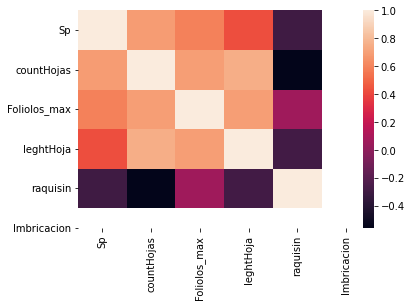

In [23]:
sn.heatmap(dfdes.corr(),
                xticklabels=dfdes.columns,
                yticklabels=dfdes.columns)

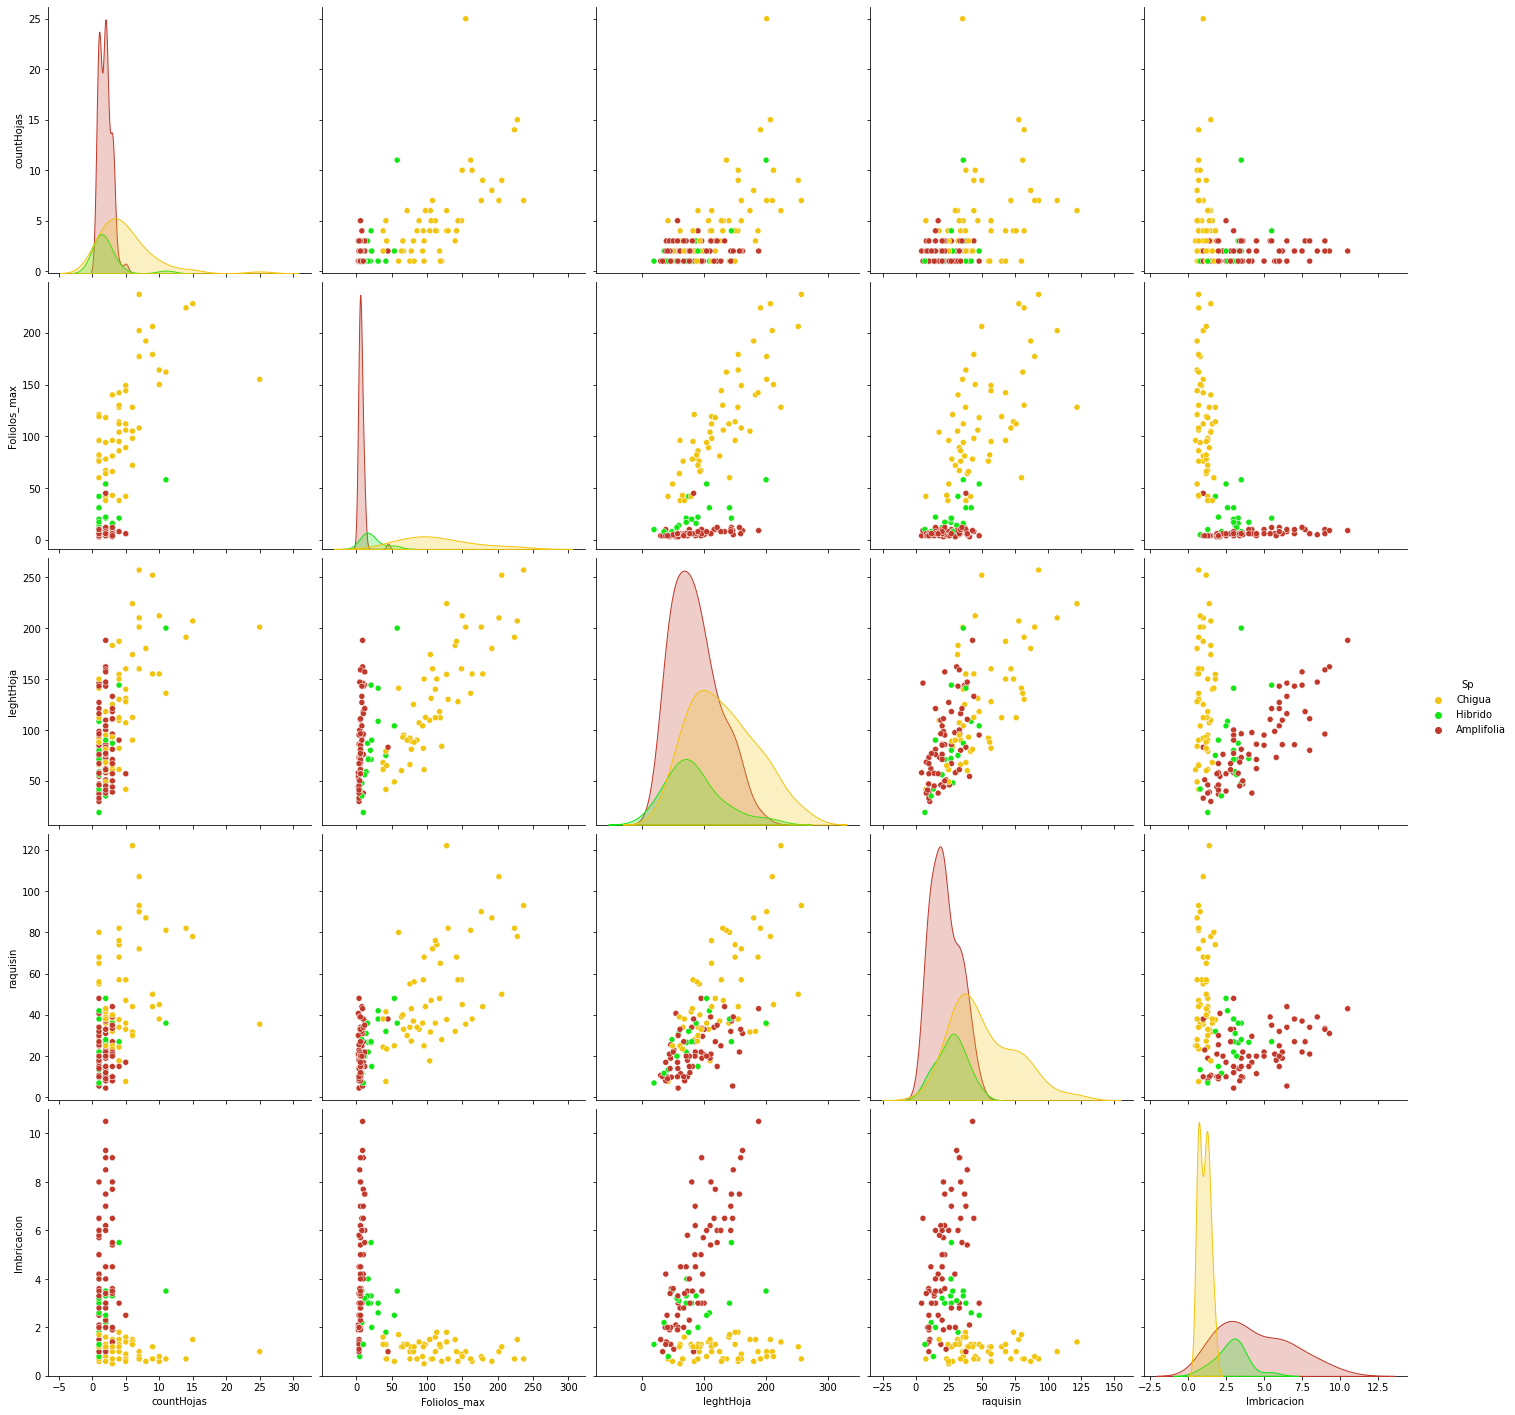

In [24]:
category_order = ["Chigua", "Hibrido", "Amplifolia"]
# Convert the 'Sp' column to a categorical variable with the desired order
dfdes["Sp"] = pd.Categorical(dfdes["Sp"], category_order)

# Define the desired color palette
color_palette = ["#F1C40F", "#12e614", "#C0392B"]

sn.pairplot(dfdes, hue='Sp', height=4, palette=color_palette)

In [25]:
from scipy.stats import mannwhitneyu


# split data into two groups based on the 'Sp' column
######### Number of Leaves
Z_chigua = dfdes[dfdes['Sp'] == 'Chigua']['countHojas']
Z_amplifolia = dfdes[dfdes['Sp'] == 'Amplifolia']['countHojas']
######### Leaflet count on the Biggest Leaf
F_chigua = dfdes[dfdes['Sp'] == 'Chigua']['Foliolos_max']
F_amplifolia = dfdes[dfdes['Sp'] == 'Amplifolia']['Foliolos_max']
######### Leaf Length
lh_chigua = dfdes[dfdes['Sp'] == 'Chigua']['leghtHoja']
lh_amplifolia = dfdes[dfdes['Sp'] == 'Amplifolia']['leghtHoja']
######### raquisin
R_chigua = dfdes[dfdes['Sp'] == 'Chigua']['raquisin']
R_amplifolia = dfdes[dfdes['Sp'] == 'Amplifolia']['raquisin']
######### Imbricacion
Im_chigua = dfdes[dfdes['Sp'] == 'Chigua']['Imbricacion']
Im_amplifolia = dfdes[dfdes['Sp'] == 'Amplifolia']['Imbricacion']


# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(Z_chigua, Z_amplifolia, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'Number of Leaves, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'Number of Leaves, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')
#####
u_stat, p_val = mannwhitneyu(F_chigua, F_amplifolia, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'Leaflet count on, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'Leaflet count on, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')  
#####
u_stat, p_val = mannwhitneyu(lh_chigua, lh_amplifolia, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'Leaf Length, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'Leaf Length, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')    
#####
u_stat, p_val = mannwhitneyu(R_chigua, R_amplifolia, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'Rachis Length, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'Rachis Length, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')    
#####
u_stat, p_val = mannwhitneyu(Im_chigua, Im_amplifolia, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'Leaflet Imbrication, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'Leaflet Imbrication, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')    
#####

Number of Leaves, The difference between the two groups is statistically significant (p=0.000, alpha=0.05)
Leaflet count on, The difference between the two groups is statistically significant (p=0.000, alpha=0.05)
Leaf Length, The difference between the two groups is statistically significant (p=0.000, alpha=0.05)
Rachis Length, The difference between the two groups is statistically significant (p=0.000, alpha=0.05)
Leaflet Imbrication, The difference between the two groups is statistically significant (p=0.000, alpha=0.05)


<ipython-input-26-943f828d7d9f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sp"] = pd.Categorical(new_df["Sp"], category_order)


<Axes: xlabel='Sp', ylabel='Imbricacion'>

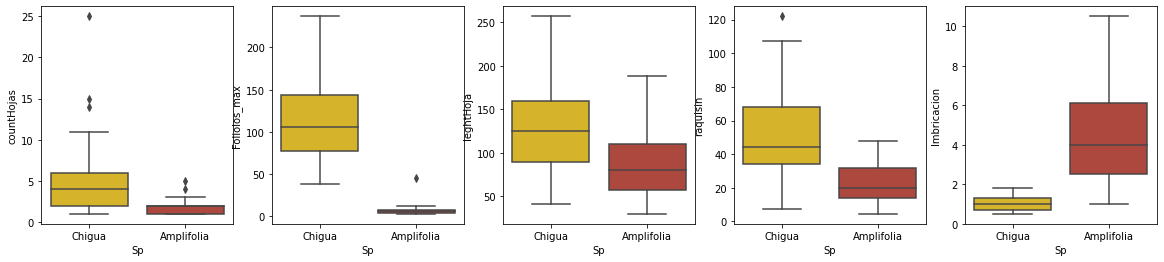

In [26]:
### Temporaly I create a new dataframe without Hibrido due to I wanna make a graph
new_df = dfdes[dfdes['Sp'] != 'Hibrido']

# Define the desired order of categories
category_order = ["Chigua", "Amplifolia"]
# Define the desired color palette
color_palette = ["#F1C40F", "#C0392B"]
# Convert the 'Sp' column to a categorical variable with the desired order
new_df["Sp"] = pd.Categorical(new_df["Sp"], category_order)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
sn.boxplot(y='countHojas', x='Sp', data=new_df, orient='v', ax=axes[0], palette=color_palette)
sn.boxplot(y='Foliolos_max', x='Sp', data=new_df, orient='v', ax=axes[1], palette=color_palette)
sn.boxplot(y='leghtHoja', x='Sp', data=new_df, orient='v', ax=axes[2], palette=color_palette)
sn.boxplot(y='raquisin', x='Sp', data=new_df, orient='v', ax=axes[3], palette=color_palette)
sn.boxplot(y='Imbricacion', x='Sp', data=new_df, orient='v', ax=axes[4], palette=color_palette)

### Adding the hybrid

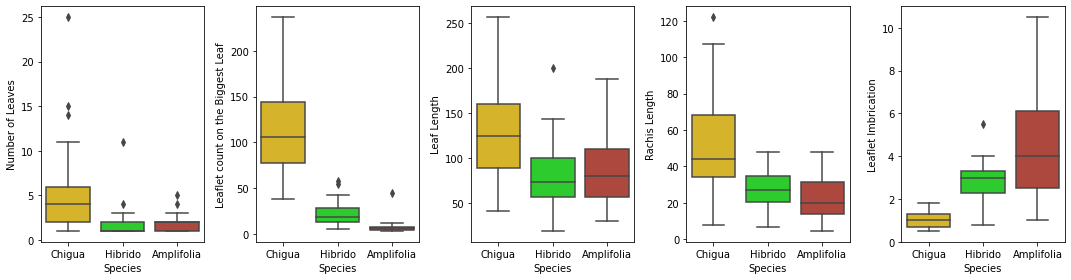

In [27]:
# Define the desired order of categories
category_order = ["Chigua", "Hibrido", "Amplifolia"]

# Define the desired color palette
color_palette = ["#F1C40F", "#12e614", "#C0392B"]

# Convert the 'Sp' column to a categorical variable with the desired order
dfdes["Sp"] = pd.Categorical(dfdes["Sp"], category_order)

# Create the boxplots with the desired color palette
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
sn.boxplot(y='countHojas', x='Sp', data=dfdes, orient='v', ax=axes[0], palette=color_palette)
sn.boxplot(y='Foliolos_max', x='Sp', data=dfdes, orient='v', ax=axes[1], palette=color_palette)
sn.boxplot(y='leghtHoja', x='Sp', data=dfdes, orient='v', ax=axes[2], palette=color_palette)
sn.boxplot(y='raquisin', x='Sp', data=dfdes, orient='v', ax=axes[3], palette=color_palette)
sn.boxplot(y='Imbricacion', x='Sp', data=dfdes, orient='v', ax=axes[4], palette=color_palette)

# Set the x-axis label to 'Species'
for ax in axes:
    ax.set_xlabel("Species")

# Set the y-axis labels for each boxplot
axes[0].set_ylabel("Number of Leaves")
axes[1].set_ylabel("Leaflet count on the Biggest Leaf")
axes[2].set_ylabel("Leaf Length")
axes[3].set_ylabel("Rachis Length")
axes[4].set_ylabel("Leaflet Imbrication")

plt.tight_layout()
plt.show()

Sp               object
countHojas        int64
Foliolos_max      int64
leghtHoja       float64
raquisin        float64
Imbricacion     float64
dtype: object

performing pairwise Mann-Whitney U tests between all possible combinations of the three species and print the results. The alternative parameter in the mannwhitneyu() function is set to 'two-sided' to test for differences in both directions (i.e., whether one group has significantly higher or lower counts of hojas than the other group). The output will show the test statistic U and the corresponding p-value for each pairwise comparison.

### Number of Leaves posthoc

In [28]:
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import itertools

chigua_countHojas = dfdes[dfdes['Sp']=='Chigua']['countHojas']
amplifolia_countHojas = dfdes[dfdes['Sp']=='Amplifolia']['countHojas']
hibrido_countHojas = dfdes[dfdes['Sp']=='Hibrido']['countHojas']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(chigua_countHojas, amplifolia_countHojas, hibrido_countHojas)

# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print('Test statistic:', stat)
if p_value < 0.02:
    print('p-value is less than 0.02')
elif p_value < 0.05:
    print('p-value is less than 0.05 but greater than or equal to 0.02')
else:
    print('p-value is greater than or equal to 0.05:', p_value)

# Create a list of all possible pairwise combinations of the three species
species = ['Chigua', 'Amplifolia', 'Hibrido']
combinations = list(itertools.combinations(species, 2))

# Perform pairwise Mann-Whitney U tests
for c in combinations:
    sp1_countHojas = dfdes[dfdes['Sp'] == c[0]]['countHojas']
    sp2_countHojas = dfdes[dfdes['Sp'] == c[1]]['countHojas']
    stat, p_value = mannwhitneyu(sp1_countHojas, sp2_countHojas, alternative='two-sided')
    print(f"{c[0]} vs {c[1]}: U = {stat:.2f}, p = {p_value:.4f}")


Kruskal-Wallis test
-------------------
Test statistic: 36.36385155652841
p-value is less than 0.02
Chigua vs Amplifolia: U = 2821.50, p = 0.0000
Chigua vs Hibrido: U = 760.50, p = 0.0001
Amplifolia vs Hibrido: U = 700.50, p = 0.2650


### Leaflet count on the Biggest Leaf posthoc

In [29]:
chigua_Foliolos_max = dfdes[dfdes['Sp']=='Chigua']['Foliolos_max']
amplifolia_Foliolos_max = dfdes[dfdes['Sp']=='Amplifolia']['Foliolos_max']
hibrido_Foliolos_max = dfdes[dfdes['Sp']=='Hibrido']['Foliolos_max']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(chigua_Foliolos_max, amplifolia_Foliolos_max, hibrido_Foliolos_max)

# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print('Test statistic:', stat)
if p_value < 0.02:
    print('p-value is less than 0.02')
elif p_value < 0.05:
    print('p-value is less than 0.05 but greater than or equal to 0.02')
else:
    print('p-value is greater than or equal to 0.05:', p_value)

# Create a list of all possible pairwise combinations of the three species
species = ['Chigua', 'Amplifolia', 'Hibrido']
combinations = list(itertools.combinations(species, 2))

# Perform pairwise Mann-Whitney U tests
for c in combinations:
    sp1_Foliolos_max = dfdes[dfdes['Sp'] == c[0]]['Foliolos_max']
    sp2_Foliolos_max = dfdes[dfdes['Sp'] == c[1]]['Foliolos_max']
    stat, p_value = mannwhitneyu(sp1_Foliolos_max, sp2_Foliolos_max, alternative='two-sided')
    print(f"{c[0]} vs {c[1]}: U = {stat:.2f}, p = {p_value:.4f}")

Kruskal-Wallis test
-------------------
Test statistic: 107.77400499359194
p-value is less than 0.02
Chigua vs Amplifolia: U = 3546.00, p = 0.0000
Chigua vs Hibrido: U = 939.50, p = 0.0000
Amplifolia vs Hibrido: U = 105.00, p = 0.0000


### Leaf Length posthoc

In [30]:
chigua_leghtHoja = dfdes[dfdes['Sp']=='Chigua']['leghtHoja']
amplifolia_leghtHoja = dfdes[dfdes['Sp']=='Amplifolia']['leghtHoja']
hibrido_leghtHoja = dfdes[dfdes['Sp']=='Hibrido']['leghtHoja']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(chigua_leghtHoja, amplifolia_leghtHoja, hibrido_leghtHoja)

# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print('Test statistic:', stat)
if p_value < 0.02:
    print('p-value is less than 0.02')
elif p_value < 0.05:
    print('p-value is less than 0.05 but greater than or equal to 0.02')
else:
    print('p-value is greater than or equal to 0.05:', p_value)

# Create a list of all possible pairwise combinations of the three species
species = ['Chigua', 'Amplifolia', 'Hibrido']
combinations = list(itertools.combinations(species, 2))

# Perform pairwise Mann-Whitney U tests
for c in combinations:
    sp1_leghtHoja = dfdes[dfdes['Sp'] == c[0]]['leghtHoja']
    sp2_leghtHoja = dfdes[dfdes['Sp'] == c[1]]['leghtHoja']
    stat, p_value = mannwhitneyu(sp1_leghtHoja, sp2_leghtHoja, alternative='two-sided')
    print(f"{c[0]} vs {c[1]}: U = {stat:.2f}, p = {p_value:.4f}")

Kruskal-Wallis test
-------------------
Test statistic: 24.39085041647637
p-value is less than 0.02
Chigua vs Amplifolia: U = 2649.00, p = 0.0000
Chigua vs Hibrido: U = 729.00, p = 0.0009
Amplifolia vs Hibrido: U = 640.00, p = 0.6946


### Rachis Length posthoc

In [32]:
chigua_raquisin = dfdes[dfdes['Sp']=='Chigua']['raquisin']
amplifolia_raquisin = dfdes[dfdes['Sp']=='Amplifolia']['raquisin']
hibrido_raquisin = dfdes[dfdes['Sp']=='Hibrido']['raquisin']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(chigua_raquisin, amplifolia_raquisin, hibrido_raquisin)

# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print('Test statistic:', stat)
if p_value < 0.02:
    print('p-value is less than 0.02')
elif p_value < 0.05:
    print('p-value is less than 0.05 but greater than or equal to 0.02')
else:
    print('p-value is greater than or equal to 0.05:', p_value)

# Create a list of all possible pairwise combinations of the three species
species = ['Chigua', 'Amplifolia', 'Hibrido']
combinations = list(itertools.combinations(species, 2))

# Perform pairwise Mann-Whitney U tests
for c in combinations:
    sp1_raquisin = dfdes[dfdes['Sp'] == c[0]]['raquisin']
    sp2_raquisin = dfdes[dfdes['Sp'] == c[1]]['raquisin']
    stat, p_value = mannwhitneyu(sp1_raquisin, sp2_raquisin, alternative='two-sided')
    print(f"{c[0]} vs {c[1]}: U = {stat:.2f}, p = {p_value:.4f}")

Kruskal-Wallis test
-------------------
Test statistic: 54.29102974806192
p-value is less than 0.02
Chigua vs Amplifolia: U = 3123.50, p = 0.0000
Chigua vs Hibrido: U = 785.50, p = 0.0000
Amplifolia vs Hibrido: U = 450.50, p = 0.1017


 ### Leaflet Imbrication

In [33]:
chigua_Imbricacion = dfdes[dfdes['Sp']=='Chigua']['Imbricacion']
amplifolia_Imbricacion = dfdes[dfdes['Sp']=='Amplifolia']['Imbricacion']
hibrido_Imbricacion = dfdes[dfdes['Sp']=='Hibrido']['Imbricacion']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(chigua_Imbricacion, amplifolia_Imbricacion, hibrido_Imbricacion)

# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print('Test statistic:', stat)
if p_value < 0.02:
    print('p-value is less than 0.02')
elif p_value < 0.05:
    print('p-value is less than 0.05 but greater than or equal to 0.02')
else:
    print('p-value is greater than or equal to 0.05:', p_value)

# Create a list of all possible pairwise combinations of the three species
species = ['Chigua', 'Amplifolia', 'Hibrido']
combinations = list(itertools.combinations(species, 2))

# Perform pairwise Mann-Whitney U tests
for c in combinations:
    sp1_Imbricacion = dfdes[dfdes['Sp'] == c[0]]['Imbricacion']
    sp2_Imbricacion = dfdes[dfdes['Sp'] == c[1]]['Imbricacion']
    stat, p_value = mannwhitneyu(sp1_Imbricacion, sp2_Imbricacion, alternative='two-sided')
    print(f"{c[0]} vs {c[1]}: U = {stat:.2f}, p = {p_value:.4f}")

Kruskal-Wallis test
-------------------
Test statistic: 84.94994258369393
p-value is less than 0.02
Chigua vs Amplifolia: U = 130.00, p = 0.0000
Chigua vs Hibrido: U = 50.00, p = 0.0000
Amplifolia vs Hibrido: U = 828.50, p = 0.0154


## Model

In [34]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dfdes)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

99 examples in training, 39 examples in testing.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(dfdes.drop("Sp", axis=1), dfdes["Sp"], test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Predict the species of a new sample
new_sample = [5, 10, 102, 19.5, 4.6]  # example of new sample
prediction = clf.predict([new_sample])

print("The predicted species is:", prediction[0])

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is:", accuracy)

The predicted species is: Amplifolia
The accuracy of the model is: 0.9761904761904762


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Let's say we have a dataset df that contains the following columns: "countHojas", "Foliolos_max", "leghtHoja", "raquisin", and "Imbricacion". We want to predict the species "Sp" based on these features.

We can use the train_test_split function from sklearn.model_selection to split the dataset into training and testing sets:

In [37]:
# Create a new DataFrame for new_sample
new_sample_df = pd.DataFrame(columns=dfdes.columns)

# Add the values for each feature without the "Sp" column
new_sample_df.loc[0] = [np.nan, 5, 10, 102, 19.5, 4.6]

# Predict the species of the new sample using the trained model
prediction = clf.predict(new_sample_df.drop("Sp", axis=1))
new_sample_df["Sp"] = prediction

# Print the predicted species for the new sample
print("The predicted species for the new sample is:", prediction[0])

# Print the new sample DataFrame
print(new_sample_df)

The predicted species for the new sample is: Amplifolia
           Sp  countHojas  Foliolos_max  leghtHoja  raquisin  Imbricacion
0  Amplifolia         5.0          10.0      102.0      19.5          4.6


Imagine we wanna apply this prediction to a dataframe which have missed the the Identification or at least there were issues on the identification species. 

Eg.

In [38]:
new_sample_df = pd.read_csv('/content/drive/MyDrive/intento/Intento_predict.csv', sep=',')
new_sample_df

,countHojas,Foliolos_max,leghtHoja,raquisin,Imbricacion
0,5,112.0,140.0,36.0,1.6
1,5,89.0,107.0,33.0,1.4
2,4,86.0,90.0,34.0,0.7
3,4,128.0,154.5,37.7,1.8
4,2,6.0,85.5,27.0,7.0
5,1,78.0,89.0,27.3,1.2
6,2,6.0,62.0,11.5,4.5
7,2,21.0,71.0,26.5,3.3
8,2,94.0,104.0,36.0,0.8
9,2,4.0,46.0,19.0,1.3


In [39]:

new_sample_df = pd.read_csv('/content/drive/MyDrive/intento/Intento_predict.csv', sep=',')

# Add a new column 'Sp' to the dataframe with empty values
new_sample_df['Sp'] = ""

clf = DecisionTreeClassifier(random_state=42)
clf.fit(dfdes.drop("Sp", axis=1), dfdes["Sp"])


# Predict the species for the new samples based on the measurements
for i, row in new_sample_df.iterrows():
    measurements = row[['countHojas', 'Foliolos_max', 'leghtHoja', 'raquisin', 'Imbricacion']].tolist()
    prediction = clf.predict([measurements])[0]
    new_sample_df.at[i, 'Sp'] = prediction

new_sample_df.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does 

,countHojas,Foliolos_max,leghtHoja,raquisin,Imbricacion,Sp
0,5,112.0,140.0,36.0,1.6,Chigua
1,5,89.0,107.0,33.0,1.4,Chigua
2,4,86.0,90.0,34.0,0.7,Chigua
3,4,128.0,154.5,37.7,1.8,Chigua
4,2,6.0,85.5,27.0,7.0,Amplifolia


Then we have a prediction or an identification base on the measurements given

In [40]:
from google.colab import files

new_sample_df.to_csv('sample_predicted.csv', index=False)
files.download('sample_predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

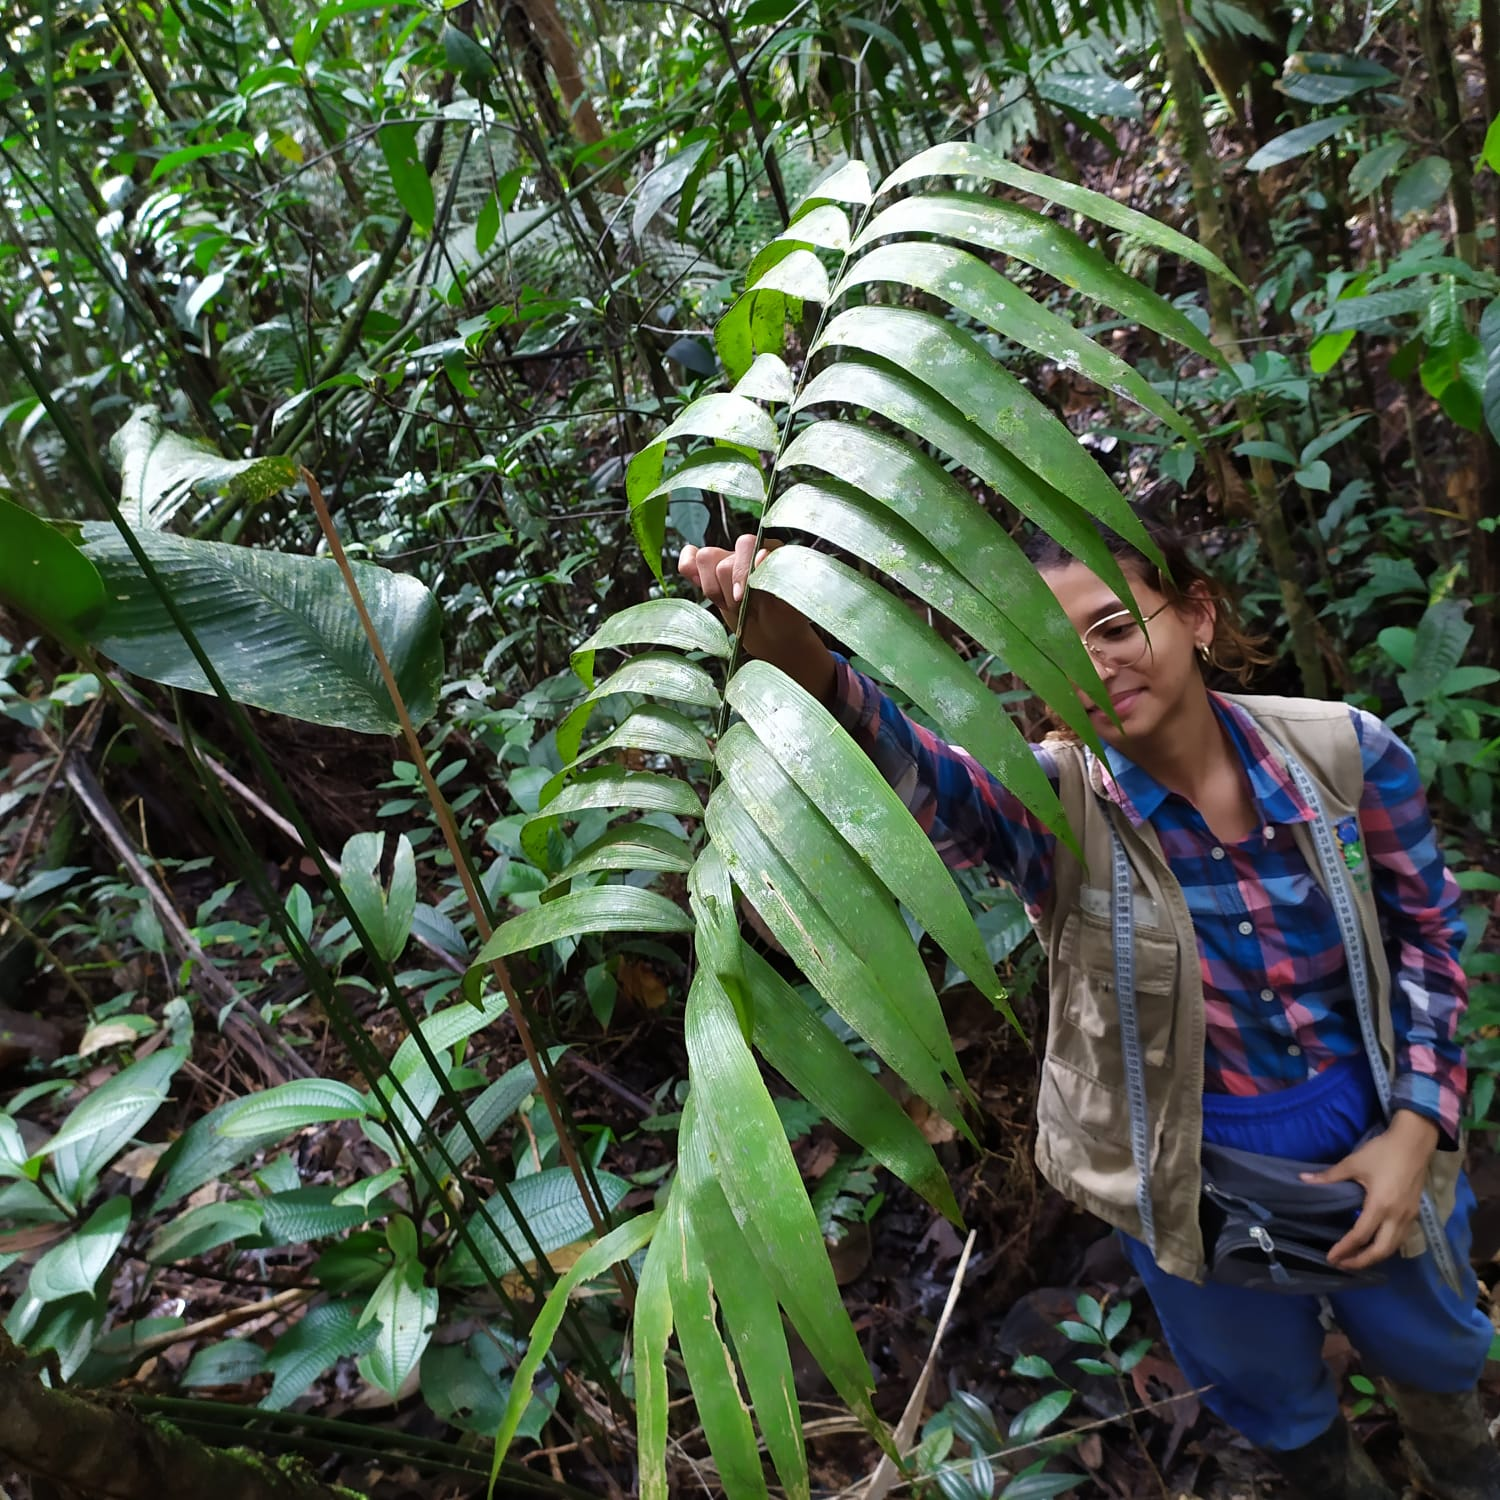

# Discussion

